Ahmad's personal notes & codes

- What is the unnamed column used for?
- NEED DIMENSION REDUCTION! Roof, frontyard, elevator, fireplace
- groupby front and compare prices?


In [195]:
import pandas as pd
import numpy as np
import math
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle
import matplotlib.pyplot as plt

# Modeling process
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, roc_auc_score, mean_squared_log_error


In [11]:
H1_data = pd.read_csv('housing.csv')

In [ ]:
H1_data.drop('Unnamed: 0', inplace=True, axis=1)

In [169]:
H1_data

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,1,...,0,0,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083
1,جدة,حي بريمان,جنوب,350,0,7,5,2,1,1,...,1,0,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...
2,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,1,...,0,0,1,0,0,1,0,1,39600,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...
3,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,1,...,1,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...
4,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,1,...,1,0,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,الدمام,حي ضاحية الملك فهد,غرب,250,0,7,5,3,1,1,...,1,0,1,0,1,1,0,0,33000,دبلكس الاجار جديد ثلاثه ادوار الحي السابع كل ٦...
2970,الرياض,حي الملز,غرب,300,33,5,5,2,1,0,...,0,0,1,0,0,0,0,0,50000,فيلا دورين درج داخلي مجددة
2971,الدمام,حي ضاحية الملك فهد,شمال,250,0,5,5,3,1,0,...,0,0,0,0,0,0,0,0,37000,فلا للايجار فى الحي الخامس التاسع \nتتكون ثلاث...
2972,الرياض,حي طويق,جنوب غربي,320,3,6,5,2,1,1,...,0,0,0,0,1,1,0,0,35000,فيلا للإيجار على زاوية\nمطبخ راكب \n٤ غرف نوم ...


In [147]:
for i in H1_data['price']:
    if i <10000:
      return i * 12
    else: return i


SyntaxError: 'return' outside function (2034055869.py, line 3)

In [178]:
dmd = H1_data.groupby(['front', 'size']).price.count()
print(dmd)

front    size
3 شوارع  205     1
         300     4
         495     1
         587     1
         750     1
                ..
غرب      1141    1
         1200    2
         1392    1
         2000    1
         3000    1
Name: price, Length: 401, dtype: int64


In [ ]:
ss= H1_data[ H1_data.details.isin([" شهري "])]
print(ss)

In [ ]:
var = H1_data[ H1_data.details.isin(["شهري"])]
print(var)

In [ ]:
H_data["details"].find_all("شهري")

In [55]:
H1_data[H1_data.price <10000]

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
162,1157,جدة,حي الزمرد,شمال,999,0,3,2,1,1,...,0,0,0,0,0,0,0,0,1100,شالية في الحالمة دورة العروس\nالمواصفات :\nغرف...
166,1255,جدة,حي الزمرد,جنوب,500,3,4,3,1,1,...,0,1,1,1,1,1,0,0,2000,شاليه كابري .. جزيرة الموج درة العروس \nاسعد ا...
266,394,الرياض,حي الرمال,غرب,298,0,4,4,1,1,...,1,0,1,0,0,1,0,1,5000,فيلا للايجار قريبه من الخدمات فيها مكيفين الإج...
346,1971,الدمام,حي ضاحية الملك فهد,غرب,300,0,5,5,2,1,...,1,0,1,0,1,1,0,0,1000,دوبلكس ٣٠٠م للبيع مليون ريال \nحي الضاحيه الح...
363,1100,جدة,حي الزمرد,شمال,350,0,4,4,1,1,...,0,1,1,0,0,1,0,0,3000,فيلا دورين مكونة من 4 غرف نوم و 4 دورات مياه و...
434,1263,جدة,حي الشاطئ,غرب,350,0,3,4,2,1,...,1,1,1,0,0,1,0,0,3500,فيلا الشاطئ جديده للايجار اليومي بالسعر المسجل...
603,787,الرياض,حي طويق,جنوب شرقي,200,2,5,5,1,1,...,0,0,1,0,1,1,0,0,3000,فله لايجار درج صاله على شارعين مدخل سياره حوش ...
668,1953,الدمام,حي المزروعية,شمال,365,5,4,5,2,1,...,0,0,0,0,1,0,0,0,7500,فيلا للإيجار بحي الشاطئ الغربي للتواصل على رقم...
676,257,الرياض,حي الرمال,شمال,270,3,4,4,1,1,...,0,0,0,0,0,1,0,0,3200,اللايجار درج داخلى بالرمال الذهبي صغيره \n...
710,490,الرياض,حي الرمال,جنوب شرقي,300,0,4,5,2,1,...,1,0,1,0,0,1,0,0,4500,فيلا ايجار في الواحه علي شارعين\nمساحه ٣٠٠\nار...


In [173]:
H1_data[H1_data.price <10000].index

Int64Index([ 162,  166,  266,  346,  363,  434,  603,  668,  676,  710, 1279,
            1284, 1675, 1820, 2153, 2411, 2518, 2536],
           dtype='int64')

### One way to fix monthly prices manually, another way?

In [23]:
H1_data['price'].replace([3300], [39600], inplace=True)


In [170]:
H1_data.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,1,...,0,0,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083
1,جدة,حي بريمان,جنوب,350,0,7,5,2,1,1,...,1,0,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...
2,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,1,...,0,0,1,0,0,1,0,1,39600,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...
3,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,1,...,1,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...
4,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,1,...,1,0,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...


In [ ]:
#H1_data["price"].replace({"a": "x", "b": "y"}, inplace=True)
print(H1_data)

## Data Splitiing

In [148]:
train, test = train_test_split(H1_data, train_size=0.7, random_state=123)

In [149]:
train.shape

(2081, 25)

In [ ]:
train.head()

In [ ]:
test.shape

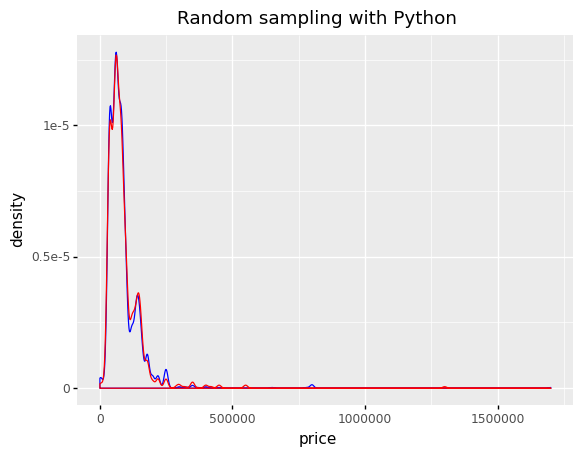

<ggplot: (8762563952141)>

In [151]:
(ggplot(train, aes('price'))
 + geom_density(color = "blue")
 + geom_density(data = test, color = "red")
 + ggtitle("Random sampling with Python"))

## Creating models

In [152]:
# separate features from labels
X_train = train[["size", "property_age"]]
y_train = train["price"]

# fit a KNN regression model with 10 neighbors
knn = KNeighborsRegressor(n_neighbors=10)
m1 = knn.fit(X_train, y_train)
pred = m1.predict(X_train)
m1

KNeighborsRegressor(n_neighbors=10)

- RMSLE

In [74]:
RMSLE = mean_squared_log_error(y_train, pred)
RMSLE

0.28942232980104704

- MSE

In [145]:
MSE = mean_squared_error(y_train, pred)
MSE

3997531540.9899087

- RMSE

In [146]:
math.sqrt(MSE)

63226.03530975123

- The log transformation on price to fix skeweness

In [88]:
log_price = np.log(H1_data['price'])

In [86]:
log_price

292     11.407565
909     11.225243
2075    11.407565
1774    11.289782
1889    12.301383
          ...    
1147    10.518673
2154    11.225243
1766    11.289782
1122    12.100712
1346    11.918391
Name: price, Length: 2081, dtype: float64

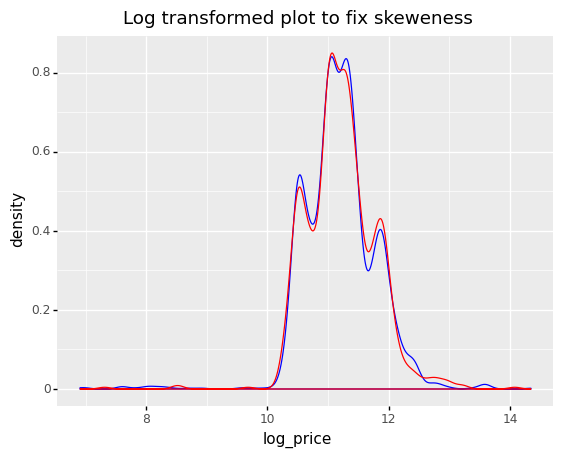

<ggplot: (8762589877209)>

In [143]:
(ggplot(train, aes('log_price'))
 + geom_density(color = "blue")
 + geom_density(data = test, color = "red")
 + ggtitle("Log transformed plot to fix skeweness"))

## Linear Regression, Best fit line

In [96]:
# create linear regression model object
lm_mod = linear_model.LinearRegression()

# fit linear model with only Gr_Liv_Area feature
lm_fit = lm_mod.fit(X_train[["size"]], y_train)

Text(1, 17, 'y = 34829.55 + 141.68x')

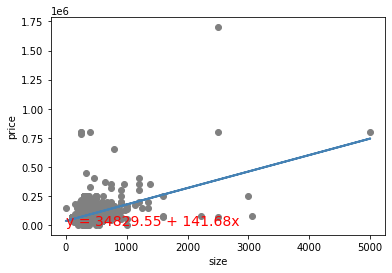

In [158]:
x_train = train["size"]
y_train = train["price"]

a, b = np.polyfit(x_train, y_train, 1)
plt.scatter(x_train, y_train, color='grey')

plt.plot(x_train, a*x_train+b, color='steelblue', linestyle='-', linewidth=2)
plt.xlabel('size')
plt.ylabel('price')

plt.text( 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14, color = 'red')

Umm.. need to drop the outliers to have much clearer plot

In [97]:
lm_fit.intercept_

34829.549656415766

In [98]:
# slope
lm_fit.coef_

array([141.68467078])

### Multipe linear regression

In [ ]:
#EDA
! pip3 install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

AutoViz
AV = AutoViz_Class()
df = AV.AutoViz('Housing.csv')